# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Saving Models
import pickle
 
import time

### Load dataset

In [17]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


# Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df0.isna().sum()[df0.isna().sum()>0]

Series([], dtype: int64)

### Gather descriptive statistics about the data

In [6]:
## MAX Week hours
print("6 days a week:",round(310/(30-4)))

print("5 days a week:",round(310/(30-8)))


6 days a week: 12
5 days a week: 14


In [137]:
# Average Happiness Ratings

print("Happiness %:",df_updated[df_updated.last_evaluation>=0.7].shape[0]/df_updated.shape[0])
print("UnHappiness %:",df_updated[df_updated.last_evaluation<0.7].shape[0]/df_updated.shape[0])

Happiness %: 0.5360687182053206
UnHappiness %: 0.46393128179467935


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
df0.columns=[str.lower(i) for i in df0.columns]

# Rename columns as needed
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [8]:
# Display all column names after the update
df0.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [7]:
# Check for duplicates
df0[df0.duplicated(keep=False)].sort_values(by=list(df0.columns))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
13089,1.00,0.88,6,201,4,0,0,0,technical,low
11375,1.00,0.93,5,167,3,0,0,0,sales,medium
13586,1.00,0.93,5,167,3,0,0,0,sales,medium
10691,1.00,0.93,5,231,2,0,0,0,marketing,medium


In [18]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_updated=df0.drop_duplicates(keep="last")


In [9]:
# Display first few rows of new dataframe as needed
df_updated[df_updated.duplicated(keep=False)].sort_values(by=list(df_updated.columns))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


### Check outliers

Check for outliers in the data.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df_updated.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

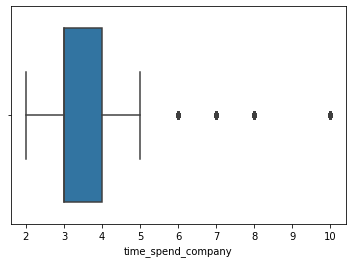

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df_updated.time_spend_company)

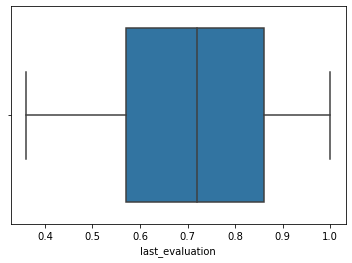

In [13]:
sns.boxplot(df_updated.last_evaluation)

In [14]:
# Determine the number of rows containing outliers
df_updated[df_updated.time_spend_company>np.percentile(df_updated.time_spend_company,90)]["department"].value_counts()

sales          242
technical      130
support        100
management      76
IT              61
marketing       56
RandD           45
product_mng     45
accounting      38
hr              31
Name: department, dtype: int64

<div class="alert alert-info" role="alert">
Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.</div>
</div>

# Step 2. Data Exploration (Continue EDA)


In [5]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_updated.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

NameError: name 'plt' is not defined

In [16]:
# Get numbers of people who left vs. stayed
print(df_updated.left.value_counts(normalize=False))
# Get percentages of people who left vs. stayed
print(df_updated.left.value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [17]:
def cat_var_compare(col_name):
    var1=df_updated[df_updated.left==1][col_name].value_counts(normalize=True)
    var2=df_updated[df_updated.left==0][col_name].value_counts(normalize=True)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    # Plot pie chart for var1 - subplot 1
    axes[0].pie(var1, labels=["No", "Yes"], autopct="%1.1f%%", startangle=90)
    axes[0].set_title('Distribution of ' + col_name + ' for Employees Who Left')

    # Plot pie chart for var2 - subplot 2
    axes[1].pie(var2, labels=["No", "Yes"], autopct="%1.1f%%", startangle=90)
    axes[1].set_title('Distribution of ' + col_name + ' for Employees Who Stayed')


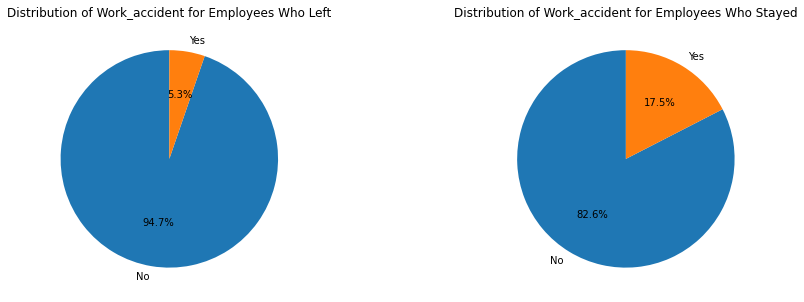

In [19]:
cat_var_compare("Work_accident")

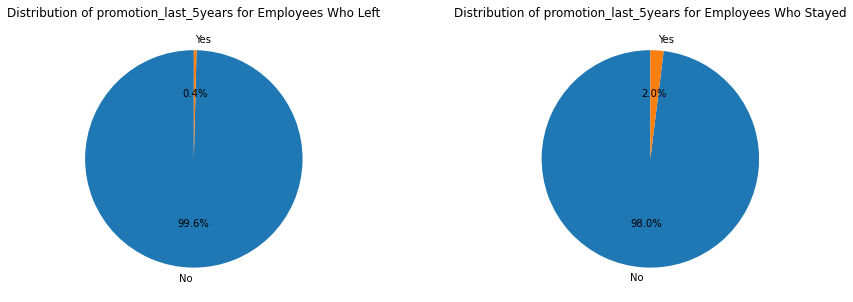

In [20]:
cat_var_compare("promotion_last_5years")

In [30]:
# Create a plot as needed
def create_boxplot(df,col_name,compare,output_col):
    
    if col_name not in df.columns:
        print("ENTER Valid Column Name")
        return
    plt.figure(figsize=(15,8))
    # Chart title
    plt.title(f"{col_name}",size=20)
    
    # Draw a nested boxplot to show bills by day and time
    sns.boxplot(y=df[col_name],x=df[compare], hue=df[output_col]);  

In [29]:
df_updated.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
783,0.36,0.46,2,132,3,0,1,0,sales,low


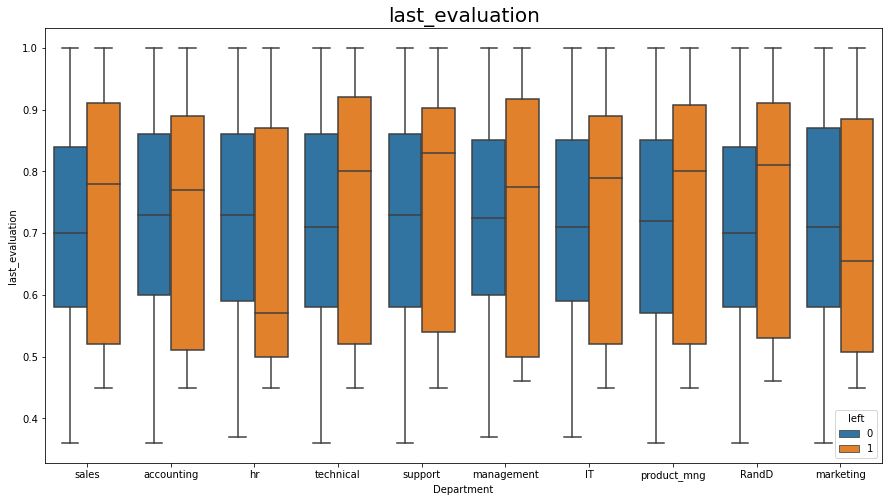

In [31]:
create_boxplot(df_updated,col_name="last_evaluation",compare="Department",output_col="left")

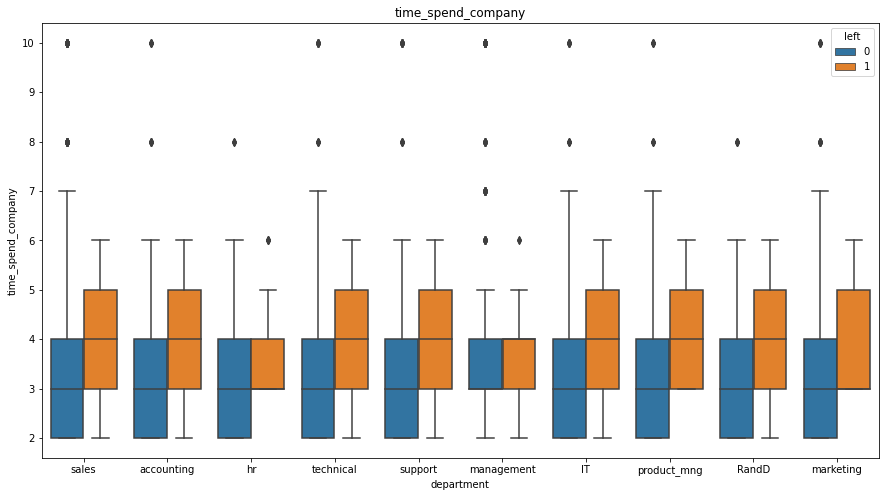

In [40]:
create_boxplot(df_updated,col_name="time_spend_company",compare="department",output_col="left")

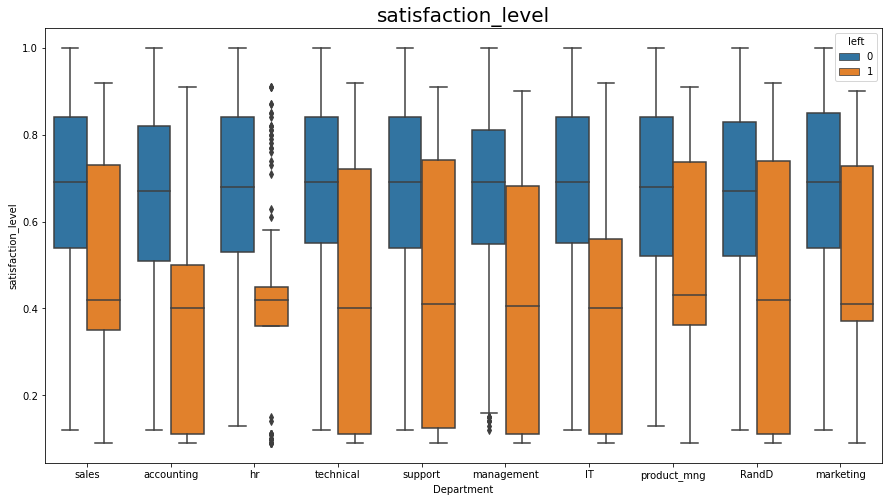

In [33]:
create_boxplot(df_updated,col_name="satisfaction_level",compare="Department",output_col="left")

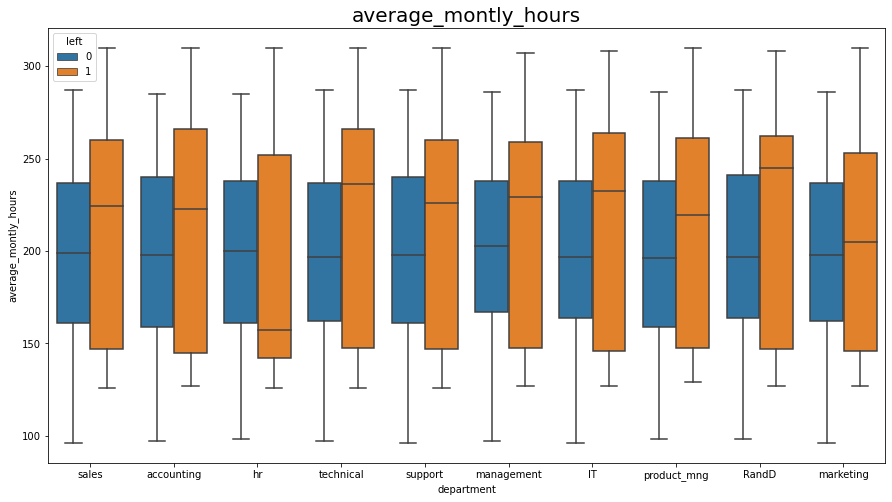

In [50]:
create_boxplot(df_updated,col_name="average_montly_hours",compare="department",output_col="left")

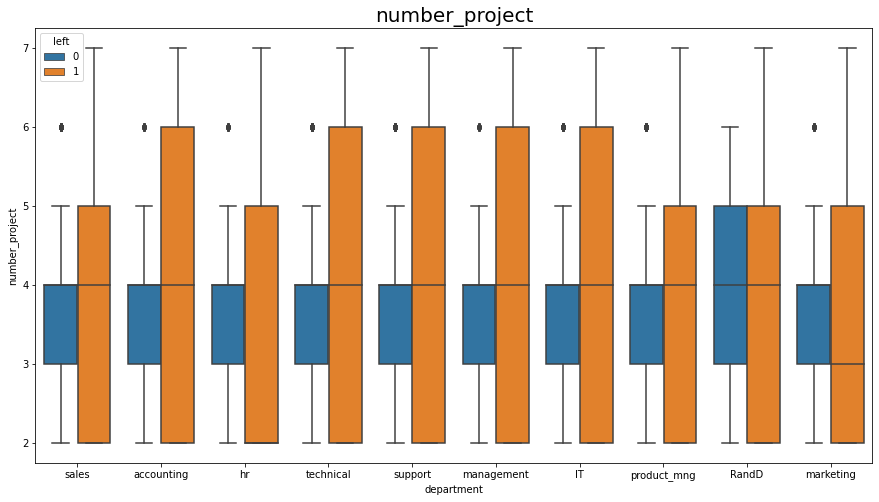

In [54]:
create_boxplot(df_updated,col_name="number_project",compare="department",output_col="left")

In [34]:
df_updated.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

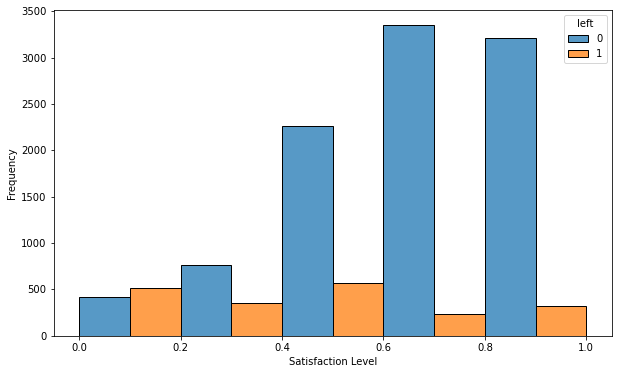

In [119]:
# Define bins for satisfaction level
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Create histogram to compare distribution of satisfaction levels
plt.figure(figsize=(10, 6))
sns.histplot(data=df_updated, x='satisfaction_level', hue='left', bins=bins, multiple='dodge')
# plt.title('Distribution of Satisfaction Level by Employee Departure')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
# plt.legend(title='Left Company', labels=['stayed','left'])
plt.show()

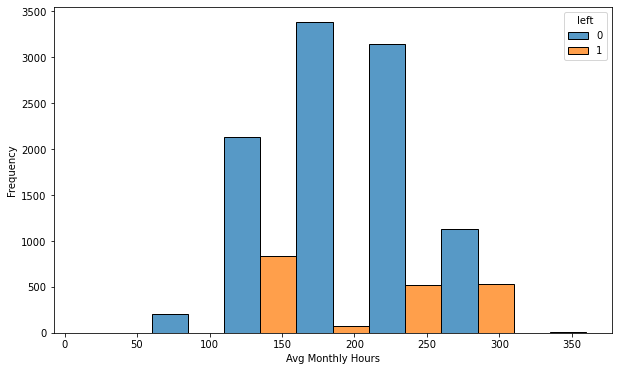

In [148]:
# Define bins for satisfaction level
bins = [i for i in range(10,401,50)]

# Create histogram to compare distribution of satisfaction levels
plt.figure(figsize=(10, 6))

sns.histplot(data=df_updated, x='average_montly_hours', hue='left', bins=bins, multiple='dodge')
plt.xlabel('Avg Monthly Hours')
plt.ylabel('Frequency')

# plt.legend(title='Left Company', labels=['stayed','left'])
plt.show()

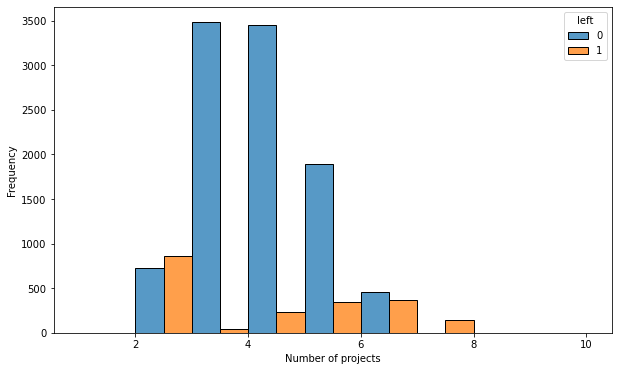

In [123]:
# Define bins for satisfaction level
bins = [1,2,3,4,5,6,7,8,9,10]

# Create histogram to compare distribution of satisfaction levels
plt.figure(figsize=(10, 6))
sns.histplot(data=df_updated, x='number_project', hue='left', bins=bins, multiple='dodge')
plt.xlabel('Number of projects')
plt.ylabel('Frequency')
# plt.legend(title='Left Company', labels=['stayed','left'])
plt.show()

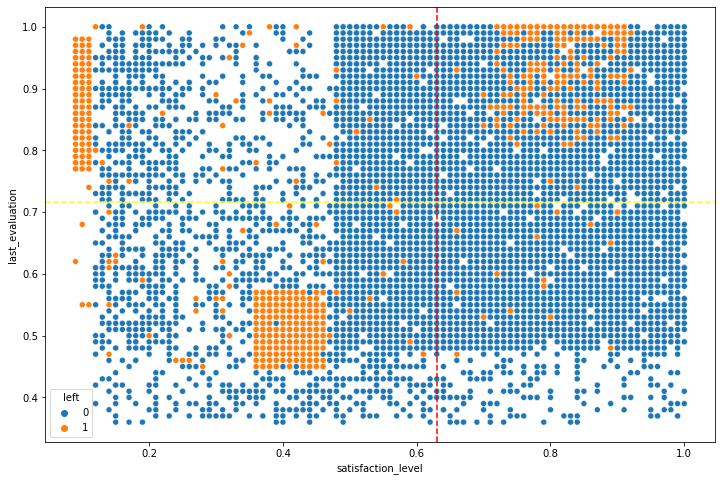

In [43]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_updated['satisfaction_level'], y=df_updated['last_evaluation'], hue=df_updated['left'])
plt.axvline(x=df_updated['satisfaction_level'].mean(), color='red', linestyle='--')  # Vertical line at mean satisfaction level
plt.axhline(y=df_updated['last_evaluation'].mean(), color='red', linestyle='--')  # Horizontal line at mean average monthly hours
plt.show()

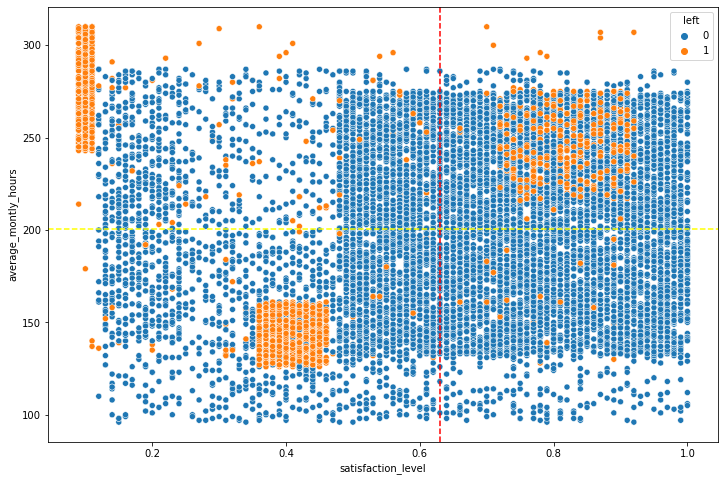

In [44]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_updated['satisfaction_level'], y=df_updated['average_montly_hours'], hue=df_updated['left'])
plt.axvline(x=df_updated['satisfaction_level'].mean(), color='red', linestyle='--')  # Vertical line at mean satisfaction level
plt.axhline(y=df_updated['average_montly_hours'].mean(), color='yellow', linestyle='--')  # Horizontal line at mean average monthly hours
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(y=df_updated['last_evaluation'], x=df_updated['average_montly_hours'], hue=df_updated['left'])
plt.axvline(y=df_updated['last_evaluation'].mean(), color='red', linestyle='--')  # Vertical line at mean satisfaction level
plt.axhline(x=df_updated['average_montly_hours'].mean(), color='yellow', linestyle='--')  # Horizontal line at mean average monthly hours
plt.show()

In [4]:
# Working Hours
print("For 8 hour 5 days a week monthly hours logged are:",round(8*(52-3)*5/12,1))

For 8 hour 5 days a week monthly hours logges are: 163.3


In [163]:
# Clearly employees are overworked
df_updated.groupby('left')["average_montly_hours"].agg([np.mean,np.median])

,mean,median
left,,
0,198.94270,198.0
1,208.16223,226.0


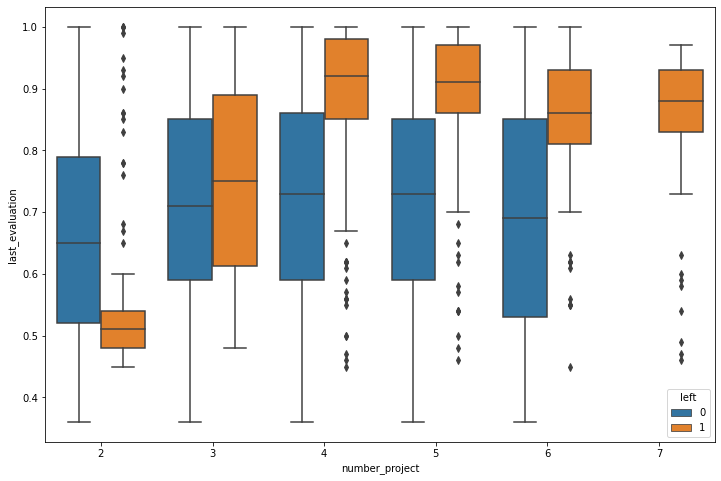

In [160]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df_updated.number_project,y=df_updated.last_evaluation,hue=df_updated.left)


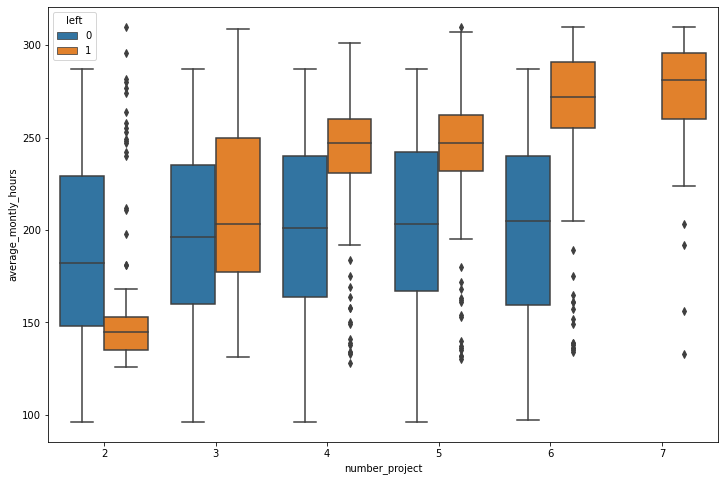

In [83]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df_updated.number_project,y=df_updated.average_montly_hours,hue=df_updated.left)


In [89]:
print("Avg Monthly Hours for people who left :",df_updated[df_updated.left==1].average_montly_hours.mean())
print("Avg Monthly Hours for people who Stayed :",df_updated[df_updated.left==0].average_montly_hours.mean())

Avg Monthly Hours for people who left : 208.16223003515822
Avg Monthly Hours for people who Stayed : 198.9427


In [72]:
# Get value counts of stayed/left for employees with 7 projects
df_updated[df_updated['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

In [143]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df_updated.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


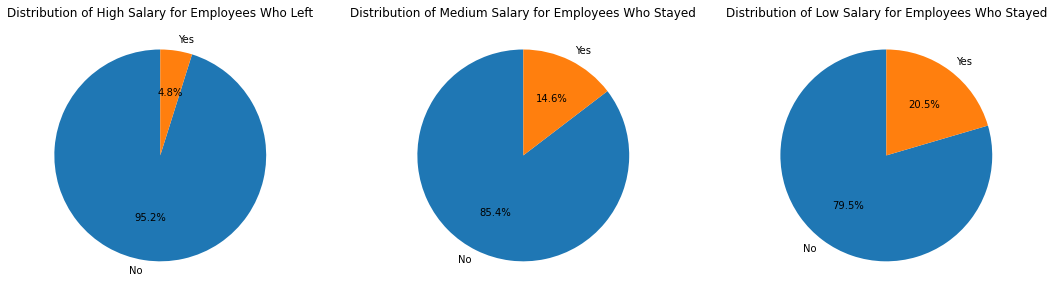

In [237]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
var1=df_updated[df_updated.salary=="high"]["left"].value_counts(normalize=True)
var2=df_updated[df_updated.salary=="medium"]["left"].value_counts(normalize=True)
var3=df_updated[df_updated.salary=="low"]["left"].value_counts(normalize=True)

# Plot pie chart for var1 - subplot 1
axes[0].pie(var1, labels=["No", "Yes"], autopct="%1.1f%%", startangle=90)
axes[0].set_title('Distribution of Attrition in' + "High Salary")

# Plot pie chart for var2 - subplot 2
axes[1].pie(var2, labels=["No", "Yes"], autopct="%1.1f%%", startangle=90)
axes[1].set_title('Distribution of Attrition in ' + "Medium Salary")


# Plot pie chart for var2 - subplot 3
axes[2].pie(var3, labels=["No", "Yes"], autopct="%1.1f%%", startangle=90)
axes[2].set_title('Distribution of Attrition in ' + "Low Salary")
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of No Promotion Last 5 for Employees Who Stayed')

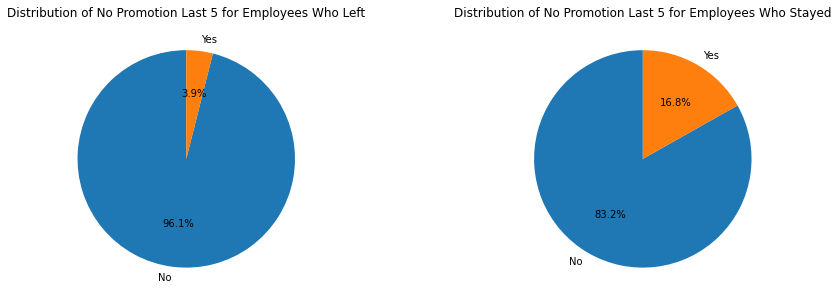

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
var1=df_updated[df_updated.promotion_last_5years==1].groupby("left")["salary"].count()
var2=df_updated[df_updated.promotion_last_5years==0].groupby("left")["salary"].count()
# Plot pie chart for var1 - subplot 1
axes[0].pie(var1, labels=["No", "Yes"], autopct="%1.1f%%", startangle=90)
axes[0].set_title('No Promotion in last 5 years' + ' for Employees Who Left')

# Plot pie chart for var2 - subplot 2
axes[1].pie(var2, labels=["No", "Yes"], autopct="%1.1f%%", startangle=90)
axes[1].set_title('No Promotion in last 5 years' + ' for Employees Who Stayed')


In [242]:
df_updated[df_updated.promotion_last_5years==1].groupby("salary")["left"].count()

salary
high       44
low        38
medium    121
Name: left, dtype: int64

Text(0.5, 1.0, 'Distribution of Salary for Employees Who Stayed')

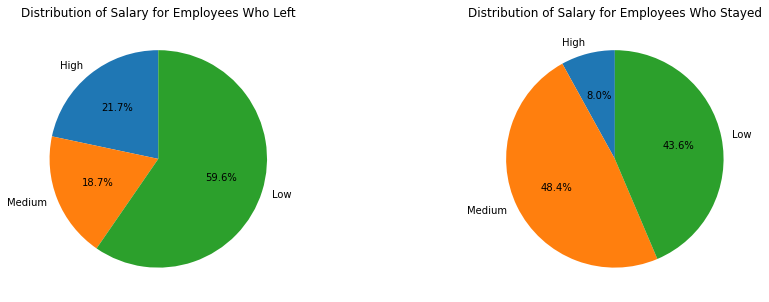

In [248]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
var1=df_updated[df_updated.promotion_last_5years==1].groupby("salary")["left"].count()
var2=df_updated[df_updated.promotion_last_5years==0].groupby("salary")["left"].count()
# Plot pie chart for var1 - subplot 1
axes[0].pie(var1,labels=["High","Medium","Low"], autopct="%1.1f%%", startangle=90)
axes[0].set_title('Distribution of ' + "Salary Type" + ' for Employees Who Left')

# Plot pie chart for var2 - subplot 2
axes[1].pie(var2, labels=["High","Medium","Low"], autopct="%1.1f%%", startangle=90)
axes[1].set_title('Distribution of ' + "Salary Type" + ' for Employees Who Stayed');


In [195]:
df_updated.groupby(["left","promotion_last_5years"])["salary"].count().reset_index()

,left,promotion_last_5years,salary
0,0,0,9805
1,0,1,195
2,1,0,1983
3,1,1,8


In [276]:
df_updated[df_updated.time_spend_company>6]["left"].value_counts()

0    282
Name: left, dtype: int64

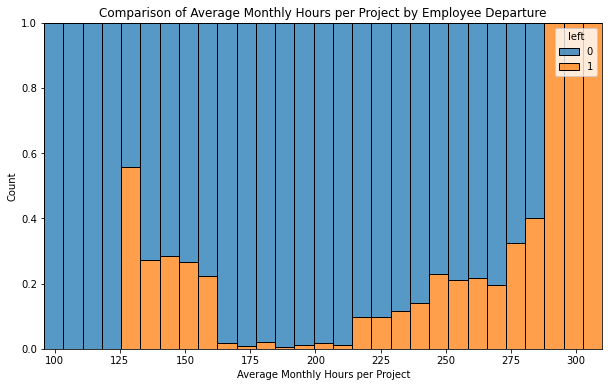

In [309]:

# Calculate average monthly hours per project
# df_updated['avg_hours_per_project'] = df_updated['average_montly_hours'] / df_updated['number_project']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.histplot(x='average_montly_hours', hue='left', data=df_updated,multiple="fill")

plt.xlabel('Average Monthly Hours per Project')
plt.ylabel('Count')
plt.title('Comparison of Average Monthly Hours per Project by Employee Departure')
plt.show()

# Clean up by dropping the temporary column
# df_updated.drop(columns=["avg_hours_per_project"], inplace=True)


## **Insights:**

> No distinct Difference in any metrics,other than `satisfaction_level` being higher for people who stayed which was true for all departments.


> As `number_projects` increases `average_month_hours` also increases.People who left had higher `number_project` than who stayed.

> As `number_projects` increases `last_evaluation` score also increases.People who left had higher `number_project` than who stayed.

> `Low` salary types make up `60%` of employees who left, but there is no dicernable difference in attrition in each 

> There are no attritions for `time_spent_company > 6`  

> There is no correlation between `promotion_last_5years` and any of the variable suggesting promotion might be a little random

**There Seems to be a management issue rewarding people for overworking rather pushing them into leaving**

> People who left had an higher evaluation score, higher number of project and were clearly over worked with higher average monthly hours *(on the contrary promotion has no impact according to the data)*

> People who got early promotions(i.e `time_spend_company` is <5 and `promotion_last_5years` is 1
  

# Step 3. Model Building
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Data Pre-Processing for the Model


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,ConfusionMatrixDisplay,confusion_matrix
import sklearn.metrics as metrics


In [20]:
x_df=pd.get_dummies(df_updated.drop(columns="left"))
y_df=df_updated[["left"]]

In [21]:
# Splitting data into test and validation 
x_train,x_validate,y_train,y_validate=train_test_split(x_df,y_df,test_size=0.20,stratify=y_df,random_state=42)

# Splitting data into test and training  
x_trn,x_test,y_trn,y_test=train_test_split(x_train,y_train,test_size=0.25,stratify=y_train,random_state=102)

In [22]:
print(f"{'Training Data split:':<30}{round(x_trn.shape[0]/df_updated.shape[0],2)*100:>10}% ({x_trn.shape[0]})")
print(f"{'Testing Data split:':<30}{round(x_test.shape[0]/df_updated.shape[0],2)*100:>10}% ({x_test.shape[0]})")
print(f"{'Validation Data split:':<30}{round(x_validate.shape[0]/df_updated.shape[0],2)*100:>10}% ({x_validate.shape[0]})")

Training Data split:                60.0% (7194)
Testing Data split:                 20.0% (2398)
Validation Data split:              20.0% (2399)


# Training Models

### Model 1- Logistic Regression Model

In [4]:
from sklearn.linear_model import LogisticRegression

In [61]:
# Had an error saying AttributeError: 'str' object has no attribute 'decode' but it says has been fixed in newer version
start_time = time.time()

model = LogisticRegression(solver='liblinear')
clf=model.fit(x_trn,y_trn['left'])

end_time = time.time()
runtime = end_time - start_time

In [63]:
clf.coef_[0]

array([-3.88624465,  0.62541906, -0.309832  ,  0.00461891,  0.3229744 ,
       -1.49607759, -1.09510759,  0.06159077, -0.3194609 , -0.01692162,
       -0.08070105, -0.31441282, -0.0360571 , -0.11869365, -0.01235027,
       -0.01675788,  0.09660083, -1.1568397 ,  0.42182108, -0.02214507])

In [64]:
clf.intercept_

array([-0.75716369])

In [65]:
# get importance
# importance = model.coef_[0]
importance = clf.coef_[0]
# summarize feature importance
df_imp = pd.DataFrame({'feature':list(x_trn.columns), 'importance':importance})

df_imp=df_imp.assign(importance_abs=df_imp['importance'].abs()).sort_values('importance_abs', ascending=False).drop(columns='importance_abs')

df_imp.head(5)

,feature,importance
0,satisfaction_level,-3.886245
5,Work_accident,-1.496078
17,salary_high,-1.156840
6,promotion_last_5years,-1.095108
1,last_evaluation,0.625419
18,salary_low,0.421821
4,time_spend_company,0.322974
8,Department_RandD,-0.319461
11,Department_management,-0.314413
2,number_project,-0.309832


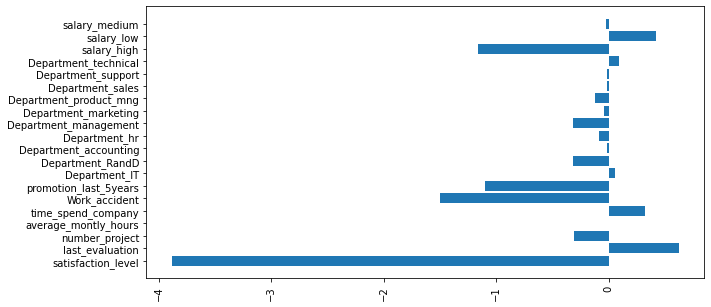

In [66]:
# plot feature importance
plt.figure(figsize=(10,5))

plt.barh(list(df_imp.feature.values),importance)
# .bar(importance,list(x_trn.columns))

plt.xticks(rotation=90)
plt.show()

In [187]:
test_scores=pd.DataFrame(columns=["model_name","accuracy","precision","recall","F1","runtime"])
# validation_scores=pd.DataFrame(columns=["model_name","accuracy","precision","recall","F1","runtime"])

def evaluate_training_model(model_object,model_name,y_pred,y_actual,df="",keep_score=False,runtime=np.nan):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import sklearn.metrics as metrics
    from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
    
    #Confusion Matrix
    cm=confusion_matrix(y_actual,y_pred,labels=model_object.classes_)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_object.classes_)
    disp.plot();
    
    # ROC Curve
    y_prob = model_object.predict_proba(x_trn)[:,1]
    # Calculate the false positive rate (FPR) and true positive rate (TPR)
    fpr, tpr, thresholds = metrics.roc_curve(y_trn, y_prob)

    # Calculate the area under the ROC curve (AUC)
    roc_auc = metrics.auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    
    # Keep Score in df
    if keep_score==True and isinstance(df, pd.DataFrame):
        
        columns_to_check=["model_name","accuracy","precision","Recall","F1"]
        if all(col in df.columns for col in columns_to_check):
            print("All required columns are present in the DataFrame.")
        else:
            print("Some required columns are missing in the DataFrame.")

        accuracy=metrics.accuracy_score(y_pred,y_test)
        precision=metrics.precision_score(y_pred,y_test)
        recall=metrics.recall_score(y_pred,y_test)
        f1=metrics.f1_score(y_pred,y_test)

        print(f"{'Accuracy Score':<25}: {accuracy:<10.2f}")
        print(f"{'Precision Score':<25}: {precision:<10.2f}")
        print(f"{'Recall Score':<25}: {recall:<10.2f}")
        print(f"{'F1 Score':<25}: {f1:<10.2f}")
        new_row = {'model_name': model_name, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'F1': f1,"runtime":runtime}

        # Append the new row to the DataFrame
        df = df.append(new_row, ignore_index=True)
        return df

    else:
        print("df should be a pandas DataFrame object please check!")
        return None
    

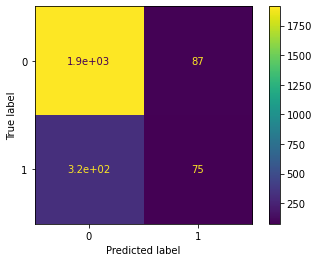

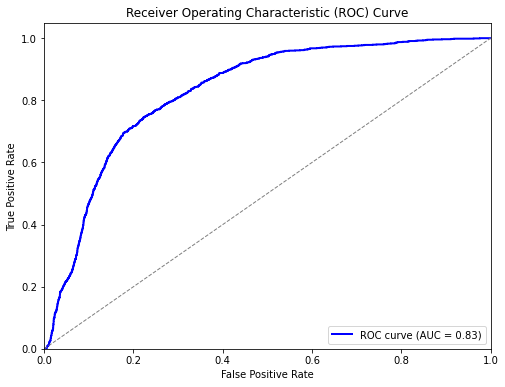

Some required columns are missing in the DataFrame.
Accuracy Score           : 0.83      
Precision Score          : 0.19      
Recall Score             : 0.46      
F1 Score                 : 0.27      


,model_name,accuracy,precision,recall,F1,runtime
0,Logistic Regression,0.829024,0.188442,0.462963,0.267857,262.471852


In [188]:
test_scores=evaluate_training_model(clf,"Logistic Regression",clf.predict(x_test),y_test,test_scores,keep_score=True,runtime=runtime)
test_scores


In [105]:
# Saving the model
with open('logistic_classifier.pickle','wb') as file:
    pickle.dump(clf,file)


### Model 2-Decision Tree
**Advantages:**

* Require relatively few pre-processing steps

* Can work easily with all types of variables (continuous, categorical, discrete) (But I have already converted all to numeric variables for the Logistic regression model)

* Do not require normalization or scaling 

* Decisions are transparent

* Not affected by extreme univariate values(robust to outliers in individual features)

**Disadvantages:**
* Can be computationally expensive relative to other algorithms

* Small changes in data can result in significant changes in predictions

**Some Assumptions of Decision Tree Classifier**

* Binary Splits
* Feature Independence
* Homogeneity
> Decision trees aim to create homogeneous subgroups in each node, meaning that the samples within a node are as similar as possible regarding the target variable. This assumption helps in achieving clear decision boundaries.

* No Missing Values

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [74]:
decision_tree_clf=DecisionTreeClassifier(random_state=422)
decision_tree_clf.fit(x_trn,y_trn)
dt_pred=decision_tree_clf.predict(x_test)


In [84]:
start_time = time.time()

decision_tree=DecisionTreeClassifier(random_state=422)
params={
    "min_samples_leaf":[2,10,20,50],
    "min_samples_split":range(1,10,1),
    "max_depth":[10,20,50,100,200]    
}
scoring={"accuracy","precision","recall","f1"}
grid_clf=GridSearchCV(decision_tree,
                     param_grid=params,
                     cv=4,refit="recall"
                     )
grid_clf.fit(x_trn,y_trn)

end_time = time.time()
runtime = end_time - start_time

In [85]:
grid_clf.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 8}

In [86]:
grid_clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=422, splitter='best')

In [87]:
grid_clf.best_score_

0.9808167279931194

In [96]:
grid_dt=grid_clf.best_estimator_
grid_dt.fit(x_trn,y_trn)
grid_dt_pred=grid_dt.predict(x_test)

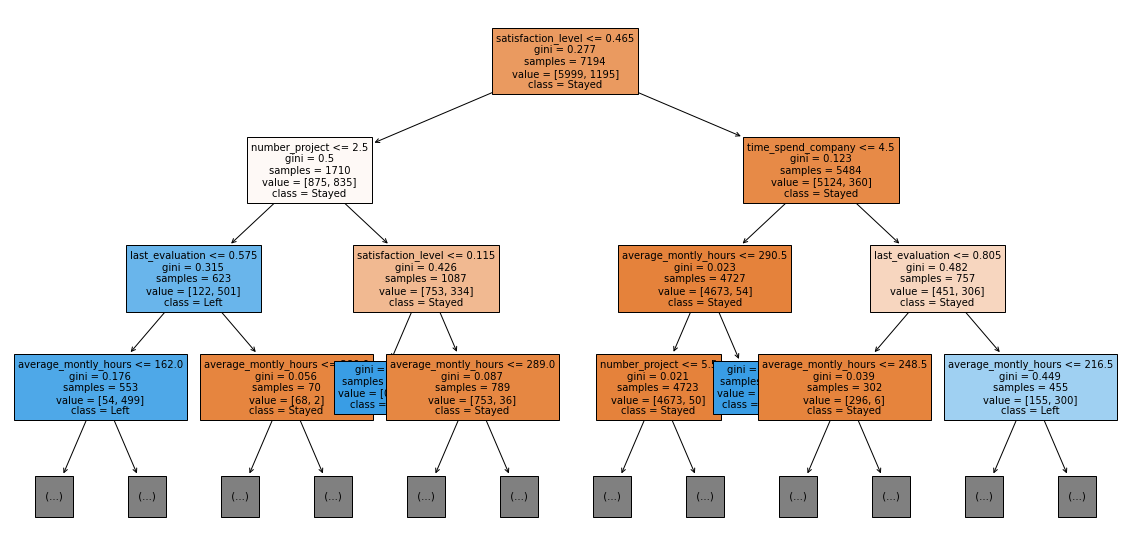

In [97]:
plt.figure(figsize=(20,10))
plot_tree(grid_dt,max_depth=3,fontsize=10,
          feature_names=x_trn.columns,
          class_names={0:'Stayed',1:"Left"},
         filled=True);

In [161]:
grid_dt.predict(x_validate)

array([0, 1, 0, ..., 0, 0, 0])

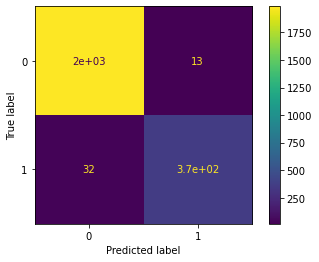

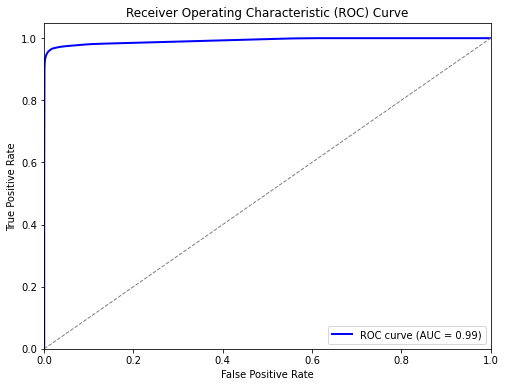

Some required columns are missing in the DataFrame.
Accuracy Score           : 0.98      
Precision Score          : 0.92      
Recall Score             : 0.97      
F1 Score                 : 0.94      


In [189]:
test_scores=evaluate_training_model(grid_dt,"Grid Search Decision Tree",grid_dt_pred,y_test,test_scores,keep_score=True,runtime=runtime)


In [162]:
# Saving the model
with open('decision_tree_clf.pickle','wb') as file:
    pickle.dump(grid_dt,file)


### Model 3 -Random Forest (Ensemble Learning)

- Random Forest is an ensemble learning method used for classification and regression tasks.
- It builds multiple decision trees during training and merges their predictions to improve accuracy and reduce overfitting.
- Each tree in the forest is built using a random subset of features and a random subset of data samples.
- Random Forest does not make strong assumptions about the distribution or relationships within the data.
- It can handle both numerical and categorical features without requiring feature scaling or encoding.
- Random Forest is robust to outliers and missing values, making it suitable for a wide range of datasets.

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
start_time = time.time()

forest_grid=RandomForestClassifier(random_state=423)
cv_params={
    'n_estimators':[50,100,200],
    'max_depth':[10,20,50],
    'min_samples_split':[2,10,20,50],
    'min_samples_leaf':[2,20],
    'max_features':[None],
    'bootstrap':[True] 
}
scoring={"accuracy","precision","recall","f1"}
forest_grid_clf=GridSearchCV(forest_grid,cv_params,scoring=scoring,cv=5,refit="recall")

end_time = time.time()

forest_grid_clf.fit(x_trn,y_trn)

runtime = end_time - start_time

In [113]:
forest_grid_pred=forest_grid_clf.predict(x_test)

In [114]:
forest_grid_clf.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

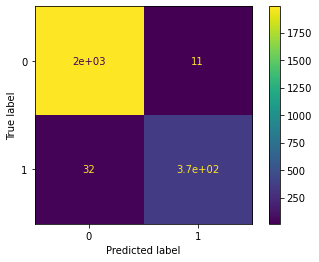

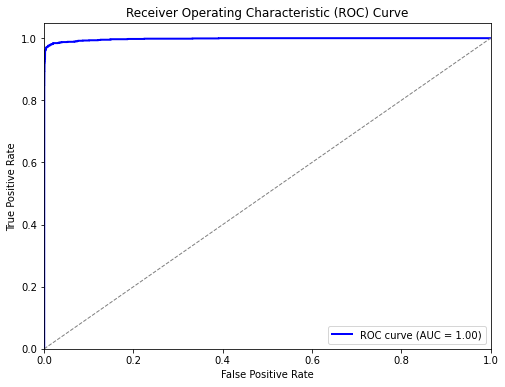

Some required columns are missing in the DataFrame.
Accuracy Score           : 0.98      
Precision Score          : 0.92      
Recall Score             : 0.97      
F1 Score                 : 0.94      


In [190]:
test_scores=evaluate_training_model(forest_grid_clf,"Random Forest",forest_grid_clf.predict(x_test),y_test,test_scores,keep_score=True,runtime=runtime)


In [117]:
# Saving the model
with open('random_forest_clf.pickle','wb') as file:
    pickle.dump(forest_grid_clf,file)


## Model 4 - XGBoost

- XGBoost (Extreme Gradient Boosting) is an optimized implementation of gradient boosting algorithms.
- It is widely used for classification and regression tasks, known for its speed and performance.
- XGBoost sequentially builds multiple decision trees, where each tree corrects the errors of the previous ones.
- XGBoost is versatile and can handle various types of data, including numerical and categorical features.
- It automatically handles missing values by learning the best imputation strategy during training.
- XGBoost is robust to outliers and does not require feature scaling, although feature engineering can improve its performance.
- It typically works well with default hyperparameters, but fine-tuning can further enhance its performance on specific datasets.

In [8]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [9]:
from sklearn.model_selection import GridSearchCV

In [120]:
start_time = time.time()

xgb=XGBClassifier(objective="binary:logistic",random_state=23)
cv_params={
    "n_estimators":range(10,101,20),
    "learning_rate":[0.001,0.003,0.005],
    "max_depth":[5,10,20,50],
    "min_child_weight":[2,10,35]
    
}
scoring={"accuracy","precision","recall","f1"}
xgb_grid=GridSearchCV(xgb,cv_params,scoring=scoring,cv=5,refit='recall')

xgb_grid.fit(x_trn,y_trn)
end_time = time.time()
runtime = end_time - start_time

In [121]:
xgb_grid.best_estimator_

0.9146443514644351

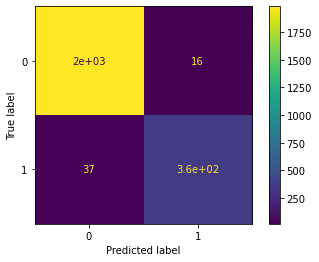

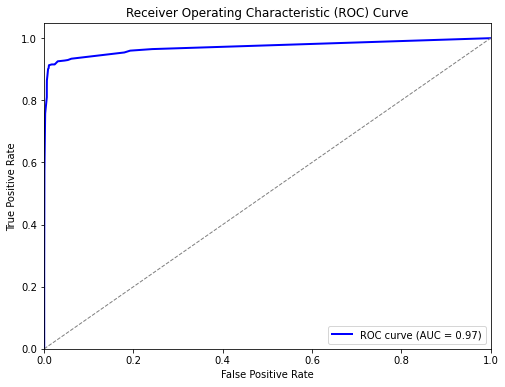

Some required columns are missing in the DataFrame.
Accuracy Score           : 0.98      
Precision Score          : 0.91      
Recall Score             : 0.96      
F1 Score                 : 0.93      


In [192]:
test_scores=evaluate_training_model(xgb_grid.best_estimator_,"XGB Classifier",xgb_grid.best_estimator_.predict(x_test),y_test,test_scores,keep_score=True,runtime=runtime)


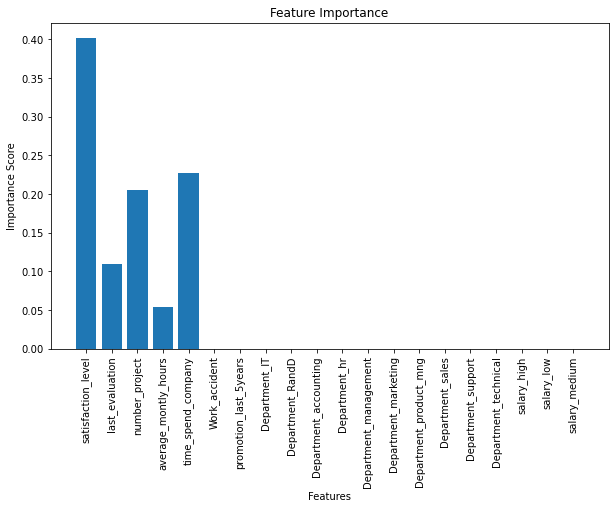

In [125]:
best_xgb_model = xgb_grid.best_estimator_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(xgb_grid.best_estimator_.feature_names_in_, xgb_grid.best_estimator_.feature_importances_)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.show()

In [138]:
# Saving the model
with open('xgb_clf.pickle','wb') as file:
    pickle.dump(xgb_grid.best_estimator_,file)


# Validation Set Evaluation

Using a validation set for model selection involves partitioning the dataset into three subsets: training, validation, and test sets. The training set is used to train the models, the validation set is used to tune hyperparameters and evaluate model performance during training, and the test set is reserved for final model evaluation. By utilizing a separate validation set, we can prevent overfitting and ensure that the selected model generalizes well to unseen data. This approach helps in selecting the best-performing model based on its performance on the validation set, ultimately improving the model's predictive accuracy and reliability.

In [25]:
validation_scores=pd.DataFrame(columns=["model_name","accuracy","precision","recall","F1"])
validation_scores

,model_name,accuracy,precision,recall,F1


In [26]:
def evaluate_validation_model(model_object,model_name,y_pred,y_actual,df="",keep_score=False,runtime=np.nan):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import sklearn.metrics as metrics
    from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
    
    #Confusion Matrix
    cm=confusion_matrix(y_actual,y_pred,labels=model_object.classes_)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_object.classes_)
    disp.plot();
    
    # ROC Curve
    y_prob = model_object.predict_proba(x_validate)[:,1]
    # Calculate the false positive rate (FPR) and true positive rate (TPR)
    fpr, tpr, thresholds = metrics.roc_curve(y_validate, y_prob)

    # Calculate the area under the ROC curve (AUC)
    roc_auc = metrics.auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    
    # Keep Score in df
    if keep_score==True and isinstance(df, pd.DataFrame):
        
        columns_to_check=["model_name","accuracy","precision","recall","F1"]
        
        if all(col in df.columns for col in columns_to_check):
            print("All required columns are present in the DataFrame.")
        else:
            print("Some required columns are missing in the DataFrame.")
            raise ValueError("WTF")

        accuracy=metrics.accuracy_score(y_pred,y_validate)
        precision=metrics.precision_score(y_pred,y_validate)
        recall=metrics.recall_score(y_pred,y_validate)
        f1=metrics.f1_score(y_pred,y_validate)

        print(f"{'Accuracy Score':<25}: {accuracy:<10.2f}")
        print(f"{'Precision Score':<25}: {precision:<10.2f}")
        print(f"{'Recall Score':<25}: {recall:<10.2f}")
        print(f"{'F1 Score':<25}: {f1:<10.2f}")
        new_row = {'model_name': model_name, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'F1': f1,"runtime":runtime}

        # Append the new row to the DataFrame
        df = df.append(new_row, ignore_index=True)
        return df

    else:
        print("df should be a pandas DataFrame object please check!")
        return None
    

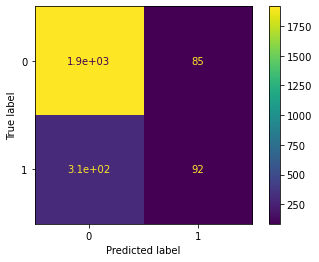

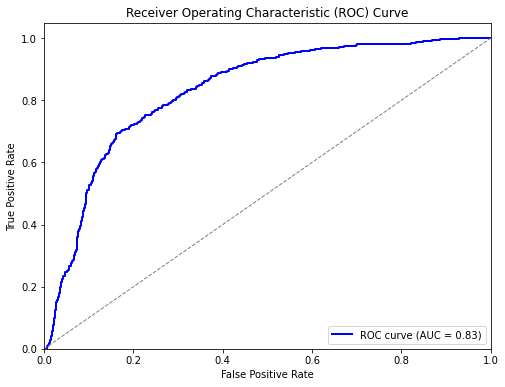

All required columns are present in the DataFrame.
Accuracy Score           : 0.84      
Precision Score          : 0.23      
Recall Score             : 0.52      
F1 Score                 : 0.32      


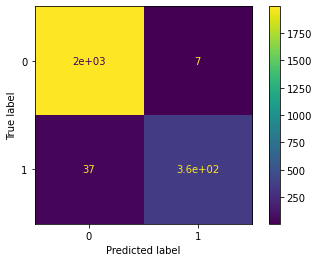

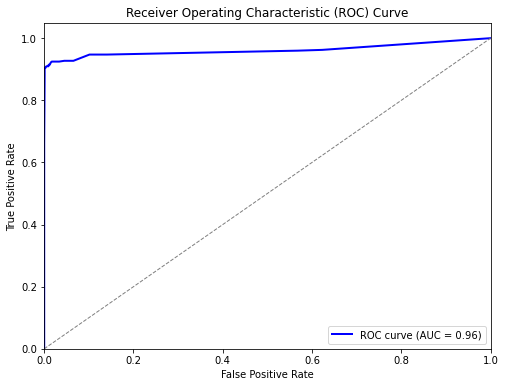

All required columns are present in the DataFrame.
Accuracy Score           : 0.98      
Precision Score          : 0.91      
Recall Score             : 0.98      
F1 Score                 : 0.94      


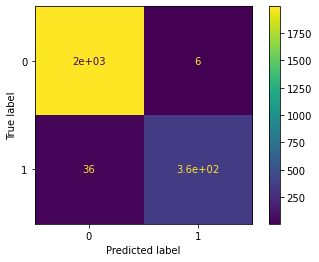

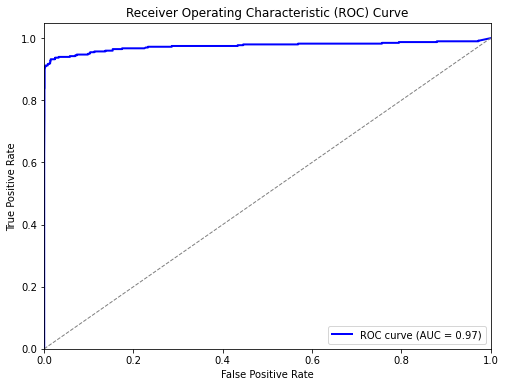

All required columns are present in the DataFrame.
Accuracy Score           : 0.98      
Precision Score          : 0.91      
Recall Score             : 0.98      
F1 Score                 : 0.95      


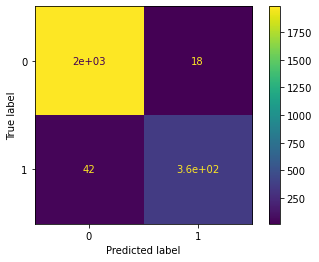

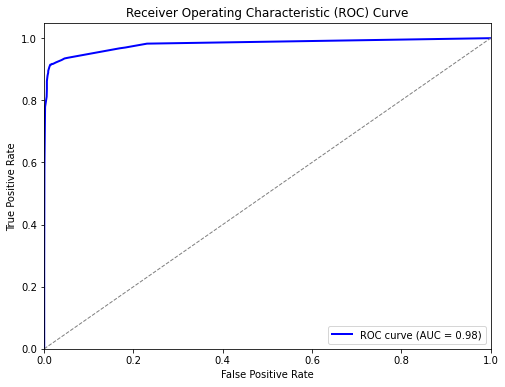

All required columns are present in the DataFrame.
Accuracy Score           : 0.97      
Precision Score          : 0.89      
Recall Score             : 0.95      
F1 Score                 : 0.92      


In [27]:
with open('logistic_classifier.pickle',"rb") as file:
    log_clf=pickle.load(file)
validation_scores=evaluate_validation_model(log_clf,"Logistic Classifier",log_clf.predict(x_validate),y_validate,df=validation_scores,keep_score=True)

with open('decision_tree_clf.pickle',"rb") as file:
    decision_tree=pickle.load(file)
# decision_tree.fit(x_trn,y_trn)
validation_scores=evaluate_validation_model(decision_tree,"Grid Search Decision Tree",decision_tree.predict(x_validate),y_validate,df=validation_scores,keep_score=True)
    

with open('random_forest_clf.pickle',"rb") as file:
    random_forest_cl=pickle.load(file)    
validation_scores=evaluate_validation_model(random_forest_cl,"Random Forest Classifier",random_forest_cl.predict(x_validate),y_validate,df=validation_scores,keep_score=True)

with open('xgb_clf.pickle',"rb") as file:
    xgb_clf=pickle.load(file)    
validation_scores=evaluate_validation_model(xgb_clf,"XGB Classifier",xgb_clf.predict(x_validate),y_validate,df=validation_scores,keep_score=True)



In [28]:
validation_scores

,model_name,accuracy,precision,recall,F1,runtime
0,Logistic Classifier,0.837015,0.231156,0.519774,0.320000,NaN
1,Grid Search Decision Tree,0.981659,0.907035,0.980978,0.942559,NaN
2,Random Forest Classifier,0.982493,0.909548,0.983696,0.945170,NaN
3,XGB Classifier,0.974990,0.894472,0.951872,0.922280,NaN


In [184]:
test_scores

,model_name,accuracy,precision,recall,F1,runtime
0,Logistic Regression,0.829024,0.188442,0.462963,0.267857,262.471852
1,GridCV-Decision Tree,0.981234,0.919598,0.965699,0.942085,262.471852
2,Random Forest,0.982068,0.919598,0.970822,0.944516,262.471852
3,XGB Classifier,0.977898,0.907035,0.957560,0.931613,262.471852



### Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






<div class="alert-info">
I selected the Random Forest Classifier as the preferred model based on the validation set results.
</div>

> It achieved the highest accuracy (98.25%) and recall (98.37%) among all models considered.

> The high recall indicates that the model effectively identifies most of the positive cases, making it suitable for applications where minimizing false negatives is crucial. 
    
> Additionally, the overall accuracy of the model demonstrates its ability to correctly classify both positive and negative cases. Therefore, the Random Forest Classifier is chosen for further evaluation and deployment.


## Test Set for model Performance

In [29]:
final_df=pd.DataFrame(columns=["model_name","accuracy","precision","recall","F1"])
final_df

,model_name,accuracy,precision,recall,F1


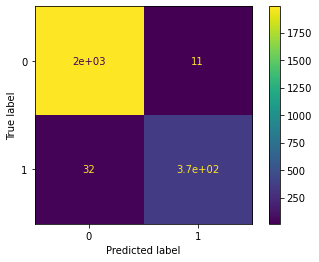

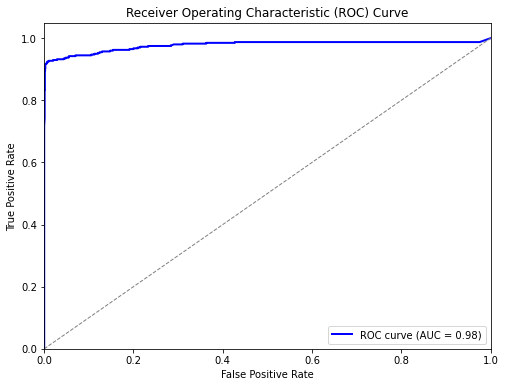

All required columns are present in the DataFrame.
Accuracy Score           : 0.98      
Precision Score          : 0.92      
Recall Score             : 0.97      
F1 Score                 : 0.94      


In [32]:
# Random Forest is the superior model since it gives a perfect blend of high precision and recall

def evaluate_test_model(model_object,model_name,y_pred,y_actual,df="",keep_score=False,runtime=np.nan):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import sklearn.metrics as metrics
    from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
    
    #Confusion Matrix
    cm=confusion_matrix(y_actual,y_pred,labels=model_object.classes_)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_object.classes_)
    disp.plot();
    
    # ROC Curve
    y_prob = model_object.predict_proba(x_test)[:,1]
    # Calculate the false positive rate (FPR) and true positive rate (TPR)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)

    # Calculate the area under the ROC curve (AUC)
    roc_auc = metrics.auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    

    columns_to_check=["model_name","accuracy","precision","recall","F1"]

    if all(col in df.columns for col in columns_to_check):
        print("All required columns are present in the DataFrame.")
    else:
        print("Some required columns are missing in the DataFrame.")
        raise ValueError("WTF")

    accuracy=metrics.accuracy_score(y_pred,y_test)
    precision=metrics.precision_score(y_pred,y_test)
    recall=metrics.recall_score(y_pred,y_test)
    f1=metrics.f1_score(y_pred,y_test)

    print(f"{'Accuracy Score':<25}: {accuracy:<10.2f}")
    print(f"{'Precision Score':<25}: {precision:<10.2f}")
    print(f"{'Recall Score':<25}: {recall:<10.2f}")
    print(f"{'F1 Score':<25}: {f1:<10.2f}")
    new_row = {'model_name': model_name, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'F1': f1,"runtime":runtime}

    # Append the new row to the DataFrame
    df = df.append(new_row, ignore_index=True)
    return df

final_df=evaluate_test_model(random_forest_cl,"Random Forest Classifier",random_forest_cl.predict(x_test),y_test,df=final_df,keep_score=True,runtime=np.nan)

In [33]:
final_df

,model_name,accuracy,precision,recall,F1,runtime
0,RANDOM FORREST TEST,0.982068,0.919598,0.970822,0.944516,NaN


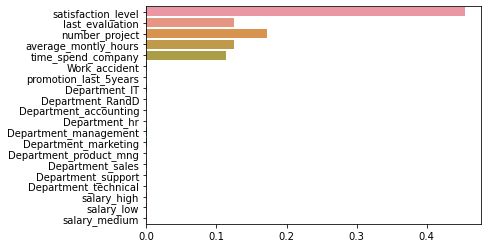

In [39]:
sns.barplot(x=random_forest_cl.best_estimator_.feature_importances_,y=x_test.columns)


### What key insights emerged from your model(s)?**

> `Satisfaction_level` score ,`last_evaluation` score and `work accidents` seems to have the highest contributing factor in the logistic regression model and Gradient Boosting Model

> *Satisfaction level* is inversely proportional to the proability of employee leaving the company i.e as satisfaction score increases less likely is the employee to leave the company

> *Last evaluation* is directly proportional to the proability of employee leaving the company i.e as higher the last evaluation score more likely is the employee to leave the company.Could be because good employees are getting more lucrative opportunities in different companies.

> *Work Accidents* is inversely proportional to the proability of employee leaving the company i.e as satisfaction score increases less likely is the employee to leave the company


### *What business recommendations do you propose based on the models built?**

> Regular monitoring of employee satisfaction levels is crucial for identifying potential attrition risks.

> Overworked employees might be more prone to leaving the company, so balancing work hours and project loads is recommended.

> There's no correlation between promotion in the last five years and attrition, suggesting that promotion might not be a significant factor in retention.

### **What potential recommendations would you make to your manager/company?**

>Implement strategies to balance workload and working hours to improve employee retention.

>Consider conducting regular employee satisfaction surveys to proactively address any issues.

### *Do you think your model could be improved? Why or why not? How?**

> The Random Forest model achieved high accuracy (98.21%), precision (91.96%), recall (97.08%), and F1 score (94.45%) on the test set.

> The model seems to perform well, but continuous training and updates could further enhance its performance.

> Further exploration of features and potential feature engineering techniques might uncover additional insights and improve model performance.

### *Given what you know about the data and the models you were using, what other questions could you address for the team?**

> Explore the effectiveness of current employee retention strategies and identify areas for improvement and incoporate that into data collection.

> **Promotion Practices**: Analyze the promotion practices within the organization. Given the lack of correlation between promotions and attrition, are promotions being awarded fairly and transparently? How can the promotion process be improved to motivate employees and reduce attrition?

> **Management Practices**: Assess management practices related to performance evaluation and recognition. Are employees feeling adequately recognized and rewarded for their contributions, or is there a bias towards overworking employees? How can management practices be adjusted to foster a healthier work culture? 

### *Do you have any ethical considerations in this stage?**

> Ensure that the models and insights derived from them are used responsibly, taking into account the potential impact on employees' lives and well-being.

> Maintain transparency and fairness in decision-making processes based on model predictions, avoiding bias and discrimination.



# Summary of model results

The Random Forest model achieved high performance metrics on the test set:

- Accuracy: 98.21%
- Precision: 91.96%
- Recall: 97.08%
- F1 Score: 94.45%

**Insights from the model and data analysis include:**

> Satisfaction level was higher for employees who stayed, indicating its importance as a retention factor.
Employees who left had higher numbers of projects and average monthly hours, suggesting potential overwork and dissatisfaction.

> Low salary types constituted 60% of employees who left, highlighting the importance of fair compensation.

> No attritions were observed for employees with a tenure of more than 6 years, indicating potential retention strategies for long-term employees.

> There was no significant correlation between promotion in the last 5 years and attrition, suggesting the need for a review of promotion practices.

The correlation matrix provided insights into the relationships between various features, such as satisfaction level, last evaluation, number of projects, and attrition.

**Recommendations based on the model results include:**

> Monitoring employee satisfaction levels regularly to identify potential attrition risks.

> Balancing workload and work hours to prevent overwork and burnout.

> Reviewing salary structures and ensuring fair compensation practices.

> Assessing and improving promotion practices to enhance employee motivation and retention.

> Implementing strategies to support long-term employee retention and well-being.

> Conducting regular employee feedback mechanisms to address dissatisfaction and improve the work environment.

Overall, the model results provide valuable insights for strategic decision-making aimed at improving employee retention and satisfaction within the organization.